

---


# **Preprocessing**


---



# **Import libraries**

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import chi2_contingency # to check the relationship of categorical variables
from itertools import combinations

# **Read Filtered data**


<font color='red'>**Please Note that**</font> the following code was used to filter data for Germany and France from original dataset (<font color='blue'>just as a reminder and not for execution</font>):

`df_filtered = df[df["Country"].isin(["FR", "DE"])]`



In [ ]:
df = pd.read_csv("data_filtered.csv",index_col=0)

print("Length (Should be 4209872):",len(df))

# **Data summary**

In [ ]:
df.head()

,ID,Country,VFN,Mp,Mh,Man,MMS,Tan,T,Va,...,IT,Ernedc (g/km),Erwltp (g/km),De,Vf,Status,year,Date of registration,Fuel consumption,Electric range (km)
0,77798939,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-12-30,1.3,59.0
1,77798940,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-10-27,1.3,60.0
2,77798941,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-10-31,1.3,59.0
3,77798942,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-11-30,1.3,59.0
4,77798943,FR,IP-DGY____EAT82552-VR3-0,STELLANTIS,PSA,PSA AUTOMOBILES SA,NaN,e9*2018/858*11066*03,N,D,...,NaN,NaN,NaN,NaN,NaN,P,2022,2022-10-27,1.3,60.0


# **Data info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4209872 entries, 0 to 9479261
Data columns (total 38 columns):
 #   Column                Dtype  
---  ------                -----  
 0   ID                    int64  
 1   Country               object 
 2   VFN                   object 
 3   Mp                    object 
 4   Mh                    object 
 5   Man                   object 
 6   MMS                   float64
 7   Tan                   object 
 8   T                     object 
 9   Va                    object 
 10  Ve                    object 
 11  Mk                    object 
 12  Cn                    object 
 13  Ct                    object 
 14  Cr                    object 
 15  r                     int64  
 16  m (kg)                float64
 17  Mt                    float64
 18  Enedc (g/km)          float64
 19  Ewltp (g/km)          float64
 20  W (mm)                float64
 21  At1 (mm)              float64
 22  At2 (mm)              float64
 23  Ft          

# **General Data Cleaning**

We remove columns with not data (100% missing data), columns with no usable data (one constant value, dates or ID's) and columns for electric cars and rows of electric and hydrogen cars, as they emissions are zero in this dataset.

In [ ]:
# Drop all columns with 100% missing data
df = df.drop(["Ernedc (g/km)","De","Vf","MMS"],axis=1)

# Drop unnecessary columns
df = df.drop(["Enedc (g/km)","ID","VFN","Tan","Status","year","Date of registration","r","Country"],axis=1)

# Drop electric cars columns
df = df.drop(["Electric range (km)","z (Wh/km)"],axis=1)

# Drop electric, hydrogen car rows
df = df.drop(df[df['Ft'].isin(['ELECTRIC',"HYDROGEN"])].index)

# recheck the data summary
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528545 entries, 0 to 9479261
Data columns (total 23 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Mp                 object 
 1   Mh                 object 
 2   Man                object 
 3   T                  object 
 4   Va                 object 
 5   Ve                 object 
 6   Mk                 object 
 7   Cn                 object 
 8   Ct                 object 
 9   Cr                 object 
 10  m (kg)             float64
 11  Mt                 float64
 12  Ewltp (g/km)       float64
 13  W (mm)             float64
 14  At1 (mm)           float64
 15  At2 (mm)           float64
 16  Ft                 object 
 17  Fm                 object 
 18  ec (cm3)           float64
 19  ep (KW)            float64
 20  IT                 object 
 21  Erwltp (g/km)      float64
 22  Fuel consumption   float64
dtypes: float64(10), object(13)
memory usage: 646.1+ MB


# **Check the correlations among the remaining** <font color='red'>**numerical columns**</font>

<Axes: >

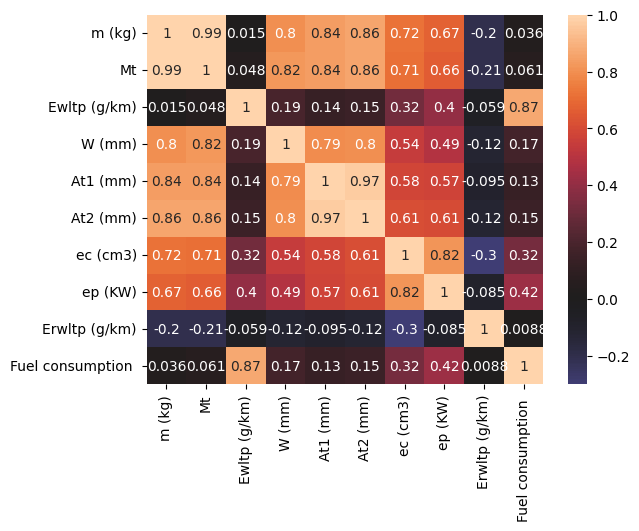

In [ ]:
sns.heatmap(df.select_dtypes(include='number').corr(),center=0,annot=True)

The evaluation shows that

1.   **m (kg)** and **Mt** are highly correlated (R = 0.99), and show exactly the same behavior with other variables, so that one of them can be omitted.

2.  **At1 (mm)** and **At2 (mm)** are highly correlated (R = 0.97), and show exactly the same behavior with other variables, so that one of them can be omitted.

3.  **ec (cm3)** and **ep (KW)** are highly correlated (R = 0.82), and show exactly the same behavior with other variables, so that one of them can be omitted.

4.   Both **m (kg)** and **Mt** are also strongly correlated with **W (mm)**, **At1 (mm)**, and **At2 (mm)** (with R ~ 0.8) and **ec (cm3)** and **ep (KW)** (with R ~ 0.7).

5.  **Ewltp (g/kg)** is highly correlated with **Fuel consumption** (with R = 0.87).

6.  **Erltp (g/kg)** is not correlated with any variable.

---


# **Check the correlations among the remaining** <font color='red'>**categorical columns** (Object types)</font>

<font color='red'>**Note**</font>: Cramers V method can be applied to find degree of association between categorical variables: Categorical features correlation. We can create a function to create heatmap visualisation to find correlated categorical columns

<font color='red'>**Note**</font>: In Cramers V, you will find values from 0 to 1 in heatmap where:

*   0 means no association
*   1 mean high association






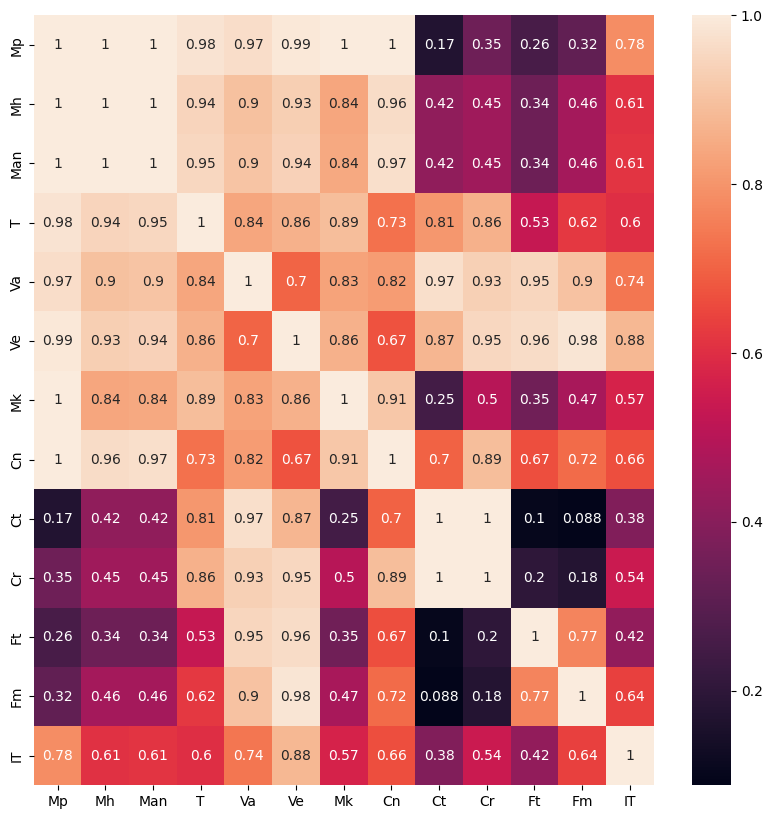

In [ ]:
def get_corr_mat(df, f=chi2_contingency):
        columns = df.columns
        dm = pd.DataFrame(index=columns, columns=columns)
        for var1, var2 in combinations(columns, 2):
            cont_table = pd.crosstab(df[var1], df[var2], margins=False)
            chi2_stat = cramers_v(cont_table.values)
            dm.loc[var2, var1] = chi2_stat
            dm.loc[var1, var2] = chi2_stat
        dm.fillna(1, inplace=True)
        return dm

def cramers_v(confusion_matrix):
        """ calculate Cramers V statistic for categorial-categorial association.
            uses correction from Bergsma and Wicher,
            Journal of the Korean Statistical Society 42 (2013): 323-328
        """
        chi2 = chi2_contingency(confusion_matrix)[0]
        n = confusion_matrix.sum()
        phi2 = chi2 / n
        r, k = confusion_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

cat_corr= get_corr_mat(df.select_dtypes(include='object'))
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(cat_corr, annot = True)
plt.show();

The evaluation shows that

1.   **Mp**, **Mn**, **Man**, **Mk**, **Cn**, **T** are highly correlated ( 1 <= R > 0.85), and show exactly the same behavior with other variables, so that one of them can be kept.

2.  **Ve** and **Va** are highly correlated (R > 0.71) with all variables and both can be dropped!

3.  **Ct** and **Cr** are highly correlated (R = 1.00), and show exactly the same behavior with other variables, so that one of them can be omitted.

4.   **Ft** and **Fm** are highly correlated (R = 0.77), and show exactly the same behavior with other variables, so that one of them can be omitted.

---

# **Data Cleaning** (<font color='red'>**Dropping Highly Correlated Columns**</font>)

What we do is:

1.   Among **m (kg)**, **Mt**, **W (mm)**, **At1 (mm)**, and **At2 (mm)**, we keep **m (kg)** as it has less percent of missing values.

2. **ep (KW)** has less missing data than **ec (cm3)**, so we keep **ep (KW)**.

3.   Among **Mp**, **Mh**, **Man**, **T**, **Cn** and **Mk**, we keep **Man** as it has less percent of missing values.

4.   We drop both **Ve**, **Va**.

5.   Between **Ct** and **Cr**, we keep **Cr** (both have no misisng values).

6.   Between **Ft** and **Fm**, we keep **Ft** (both have no misisng values).


In [ ]:
# Dropping columns
df = df.drop(["Mt", "W (mm)", "At1 (mm)", "At2 (mm)"],axis=1)
df = df.drop(["ec (cm3)"],axis=1)
df = df.drop(["Mp", "Mh", "Mk", "Cn", "T"],axis=1)
df = df.drop(["Ve", "Va"],axis=1)
df = df.drop(["Ct"],axis=1)
df = df.drop(["Fm"],axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3528545 entries, 0 to 9479261
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Man                object 
 1   Cr                 object 
 2   m (kg)             float64
 3   Ewltp (g/km)       float64
 4   Ft                 object 
 5   ep (KW)            float64
 6   IT                 object 
 7   Erwltp (g/km)      float64
 8   Fuel consumption   float64
dtypes: float64(5), object(4)
memory usage: 269.2+ MB


# **Check the percentage of missing values for remaining columns**

In [ ]:
# Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Man                   0.000000
Cr                    0.000000
m (kg)                0.000028
Ewltp (g/km)          0.180386
Ft                    0.000000
ep (KW)               0.000028
IT                   25.125427
Erwltp (g/km)        25.125569
Fuel consumption      0.919416
dtype: float64


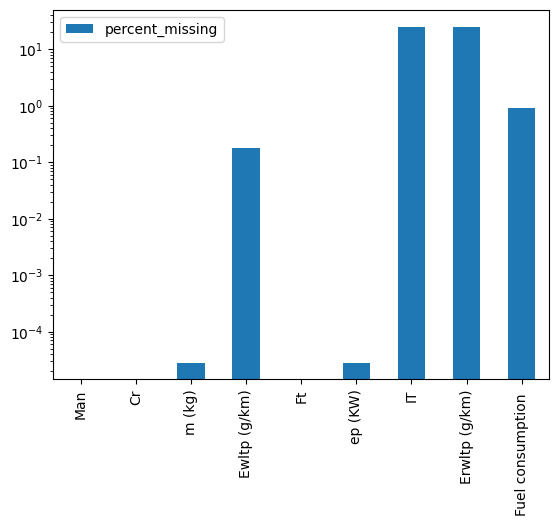

In [ ]:
percent_missing = df.isnull().sum() * 100 / len(df)
percent_missing = pd.DataFrame({'variables': df.columns,
                                'percent_missing': percent_missing})

percent_missing.plot(kind='bar', logy=True)
plt.show()

The above graph shows that **Erwltp (g/km)** and **IT** columns has around 25 % of misisng values, **Fuel consumption** around 1 % and **Ewltp (g/km)** has around 0,1 %.

# **Data Cleaning** (<font color='red'>**Handling Missing Data**</font>)

What we do is:

1.   We drop the rows with nan values for **Ewltp (g/km)**
2.   Look for the rows where **IT** is specified but **Erwltp (g/km)** is nan and fill the missing values the the mean of the **IT** group.
3.   Rows with no **IT** specified will have no emission reduction, so we fill the nan with zeros.
3.   We drop the rows with nan values for **Fuel consumption**


In [ ]:
# Emissions
print("Emission NaN entries:")
print("-------------------------")
print(df[df["Ewltp (g/km)"].isna()],"\n")
# Drop NaNs
df = df.drop(df[df["Ewltp (g/km)"].isna()].index)

Emission NaN entries:
-------------------------
                           Man  Cr  m (kg)  Ewltp (g/km)      Ft  ep (KW)  \
595865                  AA-IVA  M1  2125.0           NaN  PETROL    220.0   
595866                  AA-IVA  M1  2125.0           NaN  PETROL    220.0   
595867                  AA-IVA  M1  2125.0           NaN  PETROL    220.0   
595868                  AA-IVA  M1  2007.0           NaN  PETROL    157.0   
595872                  AA-IVA  M1  2021.0           NaN  PETROL    162.0   
...                        ...  ..     ...           ...     ...      ...   
8579407  HYUNDAI MOTOR COMPANY  M1  1395.0           NaN  PETROL    146.0   
8586221  HYUNDAI MOTOR COMPANY  M1  1930.0           NaN  PETROL    224.0   
8586260  HYUNDAI MOTOR COMPANY  M1  2325.0           NaN  DIESEL    200.0   
8586506        KIA CORPORATION  M1   984.0           NaN  PETROL     62.0   
8926794                 AA-IVA  M1  2360.0           NaN  DIESEL    120.0   

               IT  Erwltp (

In [ ]:
# Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Man                   0.000000
Cr                    0.000000
m (kg)                0.000028
Ewltp (g/km)          0.000000
Ft                    0.000000
ep (KW)               0.000000
IT                   24.990262
Erwltp (g/km)        24.990404
Fuel consumption      0.740536
dtype: float64


In [ ]:
# Fuel consumption
print("Fuel consumption NaN entries:")
print("-------------------------")
print(df[df["Fuel consumption "].isna()],"\n")
# Drop NaNs
df = df.dropna(subset=["Fuel consumption "],how="any")

Fuel consumption NaN entries:
-------------------------
                                                 Man  Cr  m (kg)  \
580176                    SAIC MOTOR CORPORATION LTD  M1  1812.0   
580179                    SAIC MOTOR CORPORATION LTD  M1  1850.0   
580180                    SAIC MOTOR CORPORATION LTD  M1  1850.0   
580181                    SAIC MOTOR CORPORATION LTD  M1  1850.0   
580824                    SAIC MOTOR CORPORATION LTD  M1  1850.0   
...                                              ...  ..     ...   
9479257                    TOYOTA MOTOR EUROPE NV SA  M1  1665.0   
9479258  HYUNDAI ASSAN OTOMOTIV SANAYI VE TICARET AS  M1  1195.0   
9479259  HYUNDAI ASSAN OTOMOTIV SANAYI VE TICARET AS  M1  1195.0   
9479260        HYUNDAI MOTOR MANUFACTURING CZECH SRO  M1  1444.0   
9479261        HYUNDAI MOTOR MANUFACTURING CZECH SRO  M1  1566.0   

         Ewltp (g/km)               Ft  ep (KW)        IT  Erwltp (g/km)  \
580176           43.0  PETROL/ELECTRIC    119.0    

In [ ]:
# Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Man                   0.000000
Cr                    0.000000
m (kg)                0.000000
Ewltp (g/km)          0.000000
Ft                    0.000000
ep (KW)               0.000000
IT                   24.547574
Erwltp (g/km)        24.547717
Fuel consumption      0.000000
dtype: float64


In [ ]:
# Erwltp (g/km) and IT
print("Erwltp (g/km) and IT NaN entries:")
print("-------------------------")
print(df[df["Erwltp (g/km)"].isna() & df["IT"].isna()],"\n")
# Drop NaNs
df = df.drop(df[df["Erwltp (g/km)"].isna() & df["IT"].isna()].index)

Erwltp (g/km) and IT NaN entries:
-------------------------
                        Man  Cr  m (kg)  Ewltp (g/km)               Ft  \
0        PSA AUTOMOBILES SA  M1  1797.0          30.0  PETROL/ELECTRIC   
1        PSA AUTOMOBILES SA  M1  1797.0          29.0  PETROL/ELECTRIC   
2        PSA AUTOMOBILES SA  M1  1797.0          30.0  PETROL/ELECTRIC   
3        PSA AUTOMOBILES SA  M1  1797.0          30.0  PETROL/ELECTRIC   
4        PSA AUTOMOBILES SA  M1  1797.0          29.0  PETROL/ELECTRIC   
...                     ...  ..     ...           ...              ...   
5696635       SKODA AUTO AS  M1  1602.0         145.0           DIESEL   
5696636       SKODA AUTO AS  M1  1602.0         145.0           DIESEL   
5696637       SKODA AUTO AS  M1  1602.0         145.0           DIESEL   
5696638       SKODA AUTO AS  M1  1524.0         161.0           PETROL   
9479252     FORD WERKE GMBH  M1  1262.0         149.0           PETROL   

         ep (KW)   IT  Erwltp (g/km)  Fuel consumpt

In [ ]:
# Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Man                  0.00000
Cr                   0.00000
m (kg)               0.00000
Ewltp (g/km)         0.00000
Ft                   0.00000
ep (KW)              0.00000
IT                   0.00000
Erwltp (g/km)        0.00019
Fuel consumption     0.00000
dtype: float64


In [ ]:
# Erwltp (g/km)
print("Erwltp (g/km) NaN entries:")
print("-------------------------")
print(df[df["Erwltp (g/km)"].isna()],"\n")
# All NaN in this case are from e2 29 technology, so we can take the mean of only that technology
it_mean = df.loc[df["IT"] == "e2 29", "Erwltp (g/km)"].mean()
it_indexes =df[df["Erwltp (g/km)"].isna()].index
df.loc[it_indexes, "Erwltp (g/km)"] = df.loc[it_indexes, "Erwltp (g/km)"].fillna(it_mean)
print("Erwltp (g/km) filled entries:")
print("-------------------------")
print(df.loc[it_indexes])

Erwltp (g/km) NaN entries:
-------------------------
                        Man  Cr  m (kg)  Ewltp (g/km)      Ft  ep (KW)     IT  \
2807     PSA AUTOMOBILES SA  M1  1475.0         131.0  PETROL     96.0  e2 29   
2808     PSA AUTOMOBILES SA  M1  1475.0         132.0  PETROL     96.0  e2 29   
2809     PSA AUTOMOBILES SA  M1  1475.0         131.0  PETROL     96.0  e2 29   
2810     PSA AUTOMOBILES SA  M1  1475.0         131.0  PETROL     96.0  e2 29   
5486330  PSA AUTOMOBILES SA  M1  1495.0         134.0  PETROL     96.0  e2 29   

         Erwltp (g/km)  Fuel consumption   
2807               NaN                5.8  
2808               NaN                5.9  
2809               NaN                5.8  
2810               NaN                5.8  
5486330            NaN                6.0   

Index([2807, 2808, 2809, 2810, 5486330], dtype='int64')
                        Man  Cr  m (kg)  Ewltp (g/km)      Ft  ep (KW)     IT  \
2807     PSA AUTOMOBILES SA  M1  1475.0         131.0  PE

In [ ]:
# Percentage of missing values
percent_missing = df.isnull().sum() * 100 / len(df)
print(percent_missing)

Man                  0.0
Cr                   0.0
m (kg)               0.0
Ewltp (g/km)         0.0
Ft                   0.0
ep (KW)              0.0
IT                   0.0
Erwltp (g/km)        0.0
Fuel consumption     0.0
dtype: float64


# **Further preprocessing**

What we do is:

1.   Replace faulty column name of **Fuel consumption**
2.   Replace faulty descriptions of **Ft**
3.   Convert **IT** into a binary variable.
4.   Convert categorical variable into dummy/indicator variables


In [ ]:
# Replace faulty column name of Fuel consumption
print("Column names before:")
print(df.columns)
df = df.rename(columns={"Fuel consumption ":"Fuel consumption"})
print("Column names after:")
print(df.columns)

# Replace faulty descriptions (NG to NG-BIOMETHANE)
print("Fuel Type values:")
print("-----------------")
print("Values before:", df['Ft'].unique())
df["Ft"]=df["Ft"].replace({"NG":"NG-BIOMETHANE"})
print("Values after:", df['Ft'].unique(),"\n")

# IT
# Replace: 1 for any technology, 0 for none
print("IT values distribution:")
print("-----------------------")
df["IT"] = df["IT"].apply(lambda x: 1 if x!=0 else 0)
print(df["IT"].value_counts())

# Convert categorical variable into dummy/indicator variables
df = pd.get_dummies(df, prefix_sep='_', drop_first=True, dtype="int")
df.head()